In [1]:
import pandas as pd
import imaplib as plt
import numpy as np

In [3]:
import os
os.chdir('C:/Users/jacob odaudu/Downloads')
cwd = os.getcwd()
cwd

'C:\\Users\\jacob odaudu\\Downloads'

In [4]:
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
    print (f)

10_1_Chicago_Payroll_Data_Exercise_2 (1).ipynb
10_1_Chicago_Payroll_Data_Exercise_2.ipynb
10_2_Chicago_Payroll_Data_Exercise_2_Solution.ipynb
15213269.2021.pdf
1_1_Project_Oil_vs_Banks_in_Resession_OverView.ipynb
1_Linear_Regression.ipynb
1_matplotlib_essentials.ipynb
1_NumPy_Essentials (1).ipynb
1_NumPy_Essentials.ipynb
1_Python_Essentials.ipynb
1_Seaborn_intro.ipynb
20190424_214502.jpg
2021 APPCC Assignment Front cover.docx
20220110_203517 (1).jpg
20220110_203517.jpg
210474-60105-30-Will-Share (1).docx
210474-60105-30-Will-Share.docx
2_1_matplotlib_Exercises.ipynb
2_2_matplotlib_Exercises_Sol.ipynb
2_Python_Essentials.ipynb
2_Series (1).ipynb
2_Series (2).ipynb
2_Series (3).ipynb
2_Series (4).ipynb
2_Series.ipynb
3_DataFrame (1).ipynb
3_DataFrame.ipynb
3_Python_Essentials.ipynb
4_1_NumPy_Essentials_Exercises_Overview (1).ipynb
4_1_NumPy_Essentials_Exercises_Overview (2).ipynb
4_1_NumPy_Essentials_Exercises_Overview (3).ipynb
4_1_NumPy_Essentials_Exercises_Overview.ipynb
4_1_Python_Es

In [53]:
crime=pd.read_csv('crimes-2017-18.csv')

C:\Users\jacob odaudu\AppData\Local\Temp\ipykernel_7440\2850876715.py:1: DtypeWarning: Columns (0,2,3,4,5,6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  crime=pd.read_csv('crimes-2017-18.csv')


In [54]:
#crime.dropna(how='all', inplace=True)
crime.shape[0]

215002

In [56]:
crime.dropna().count()

Financial Year          191098
Financial Quarter       191098
Force Name              191098
CSP Name                191098
Offence Description     191098
Offence Group           191098
Offence Subgroup        191098
Offence Code            191098
Number of offences      191098
Date                    191098
dtype: int64

1.What is the total number of burglaries in October 2018? 

In [43]:
#crime['Date'] = crime['Date'].astype(str)
#crime[((crime['Offence Subgroup'] =='Non-domestic burglary') | (crime['Offence Subgroup'] =='Domestic burglary')) & (crime['Date'].apply(lambda x: x[2:]) == '/10/2018')]


In [57]:
crime = crime[crime['Date'].notna()]
mask = crime['Date'].str.contains(r'10/2018')&crime['Offence Subgroup'].str.contains(r'burg|Burg')
crime1 = crime[mask]

crime1.shape[0]



1147

9082 total of rows i.e total data

2.What are the different types of burglaries in 2017? 

In [58]:
dif_burg2=crime[(crime['Offence Subgroup'].str.contains(r'burg|Burg'))&(crime['Date'].str.contains(r'/2017'))]
dif_burg2['Offence Subgroup'].value_counts()

Domestic burglary        7659
Non-domestic burglary    4699
Name: Offence Subgroup, dtype: int64

In [46]:
'''dif_burg=crime[((crime['Offence Subgroup'] =='Non-domestic burglary') | (crime['Offence Subgroup'] =='Domestic burglary')) & (crime['Date'].apply(lambda x: x[6:]) == '2017')]
dif_burg['Offence Description '].value_counts()'''

"dif_burg=crime[((crime['Offence Subgroup'] =='Non-domestic burglary') | (crime['Offence Subgroup'] =='Domestic burglary')) & (crime['Date'].apply(lambda x: x[6:]) == '2017')]\ndif_burg['Offence Description '].value_counts()"

3.Visualise the total number of burglaries in 2017 and 2018 according to their types?

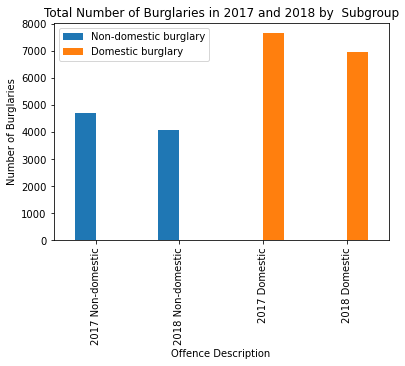

In [86]:
import matplotlib.pyplot as plt

# Calculate the counts for each offence subgroup in 2017 and 2018
total_type1 = crime[(crime['Date'].str.contains(r'2017'))&(crime['Offence Subgroup']=='Non-domestic burglary')]
total_type2 = crime[(crime['Date'].str.contains(r'2018'))&(crime['Offence Subgroup']=='Non-domestic burglary')]
total_type3 = crime[(crime['Date'].str.contains(r'2017'))&(crime['Offence Subgroup']=='Domestic burglary')]
total_type4 = crime[(crime['Date'].str.contains(r'2018'))&(crime['Offence Subgroup']=='Domestic burglary')]

# Calculate the counts for each subgroup
counts1 = total_type1['Offence Subgroup'].value_counts()
counts2 = total_type2['Offence Subgroup'].value_counts()
counts3 = total_type3['Offence Subgroup'].value_counts()
counts4 = total_type4['Offence Subgroup'].value_counts()

# Create a list of all the unique offence descriptions
offence_descriptions = set(counts1.index) | set(counts2.index) | set(counts3.index) | set(counts4.index)

# Create a dictionary to store the counts for each subgroup for each offence description
subgroup_counts = {od: [counts1.get(od, 0), counts2.get(od, 0), counts3.get(od, 0), counts4.get(od, 0)] for od in offence_descriptions}


subgroup_counts_df = pd.DataFrame(subgroup_counts, index=['2017 Non-domestic', '2018 Non-domestic', '2017 Domestic', '2018 Domestic'])
subgroup_counts_df.plot(kind='bar')


plt.xlabel('Offence Description')
plt.ylabel('Number of Burglaries')
plt.title('Total Number of Burglaries in 2017 and 2018 by Subgroup')


plt.xticks(rotation=90)

plt.show()






In [85]:
'''import matplotlib.pyplot as plt

# Get the total number of burglaries in 2017 and 2018 by their type
total_type=crime[((crime['Offence Subgroup'] =='Non-domestic burglary') | (crime['Offence Subgroup'] =='Domestic burglary'))
&((crime['Date'].apply(lambda x: x[6:]) == '2017')|(crime['Date'].apply(lambda x: x[6:]) == '2018'))]
offence_counts = total_type['Offence Subgroup'].value_counts()

# Plot the data using a bar chart
offence_counts.plot(kind='bar')


# Add labels and a title to the chart
plt.xlabel('Offence type')
plt.ylabel('Number of Burglaries')
plt.title('Total Number of Burglaries in 2017 and 2018 by Offence Description')

plt.xticks(rotation=90)
# Show the chart
plt.show()''''




SyntaxError: EOL while scanning string literal (1910947033.py, line 19)

4.What is the total number of burglaries related to sexual offences?

In [130]:
sex_off=crime[(crime['Offence Description '].str.contains(r'sex|Sex')&(crime['Offence Description '].str.contains(r'Burg|burg')))]
sex_off


,Financial Year,Financial Quarter,Force Name,CSP Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of offences,Date


the answer is 0

5.Plot a chart of the top 3 offence groups and the least 3 offence groups according to the number of offence?

In [71]:
crime['Offence Group'].tail(3)

Public order offences    5840
Drug offences            5840
Robbery                  2920
Name: Offence Group, dtype: int64

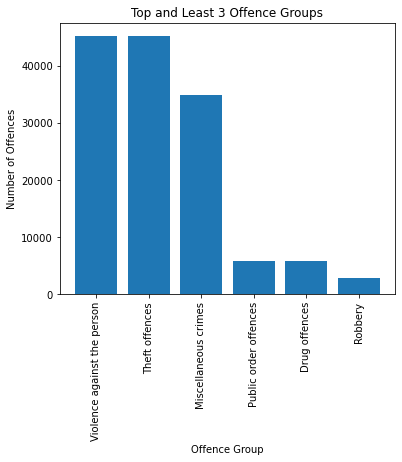

In [70]:
top_three_list = list(crime['Offence Group'].value_counts().head(3).index)
bot_three_list = list(crime['Offence Group'].value_counts().tail(3).index)
top_and_bot_list = top_three_list + bot_three_list
range_6 = crime[crime['Offence Group'].isin(top_and_bot_list)]

plt.figure(figsize=(6,5))
plt.bar(range_6['Offence Group'].value_counts().index, range_6['Offence Group'].value_counts())
plt.xlabel('Offence Group')
plt.ylabel('Number of Offences')
plt.title('Top and Least 3 Offence Groups')
plt.xticks(rotation=90)
plt.show()



6.List all offences in all months in 2017 till the last day of summer in 2020 (for excel only)

7.What day of the month has the highest number of offences?

In [7]:
crime['Date'].value_counts().head(3)

01/02/2017    596
08/02/2017    588
02/02/2017    588
Name: Date, dtype: int64

answer:01/02/2017

8.Which of the 4 seasons (summer, autumn etc.) has the highest number of robberies in the data (excel only)